In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pearc19_model import pop_dyn, pop_dyn_cap, pop_dyn_cap_sick
from scipy.optimize import fmin
import pandas as pd
import math

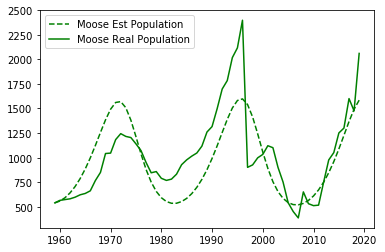

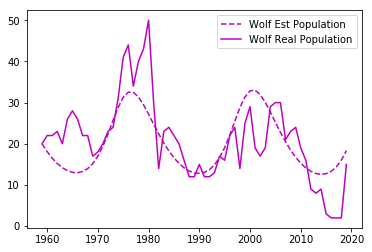

39.0455292229105


In [2]:
df = pd.read_excel('wolf_moose_data.xlsx')
years = df['year'].astype(int)
num_wolves = df['wolves'].astype(float)
num_moose = df['moose'].astype(float)

c1 = 'm'
c2 = 'g'

def rmse(val1, val2, val3, val4):
    return math.sqrt(np.sum((val1-val2)**2 + (val3-val4)**2))/60
    

def cost_func(beta):
    t,M,W = pop_dyn_cap_sick(beta)
    return np.sum(2000*(num_wolves - W)**2 + (num_moose - M)**2)
        
beta0 = [0.2, 0.003, 0.001, 0.5, 0.0001, .00001]
beta = fmin(cost_func, beta0)

t,M,W = pop_dyn_cap_sick(beta)

plt.figure()
# Plot the moose population
plt.plot(years, M, c2+'--', label = "Moose Est Population")
plt.plot(years, num_moose, c2, label = "Moose Real Population")
plt.legend()
plt.savefig("M_est_cap_sick.png",dpi=250)
plt.show()

plt.figure()
# Plot the moose population
plt.plot(years, W, c1+'--', label = "Wolf Est Population")
plt.plot(years, num_wolves, c1, label = "Wolf Real Population")
plt.legend()
plt.savefig("W_est_cap_sick.png",dpi=250)
plt.show()

print(rmse(M, num_moose, W, num_wolves))